In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/7


In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
grades = pd.read_csv(path + "/StudentPerformanceFactors.csv")
grades.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
grades.query('Exam_Score == 101')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [ ]:
grades = grades.query('Exam_Score < 85')

In [ ]:
grades.shape

(6572, 20)

In [ ]:
grades.isnull().values.any()

True

In [ ]:
grades.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Vamos preencher os nulos usando regressão linear :D

In [ ]:
df = grades.dropna(how='any', axis=0)
df.reset_index(inplace=True,drop=True)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
target = df['Exam_Score']
df = df.drop(['Exam_Score'], axis = 1)

In [ ]:
df['Grade'] = ['A' if x >= 90 else 'B' if x >= 80 else 'C' if x >= 70 else 'D' if x >= 60 else 'E' for x in target]

In [ ]:
Grade = df['Grade']

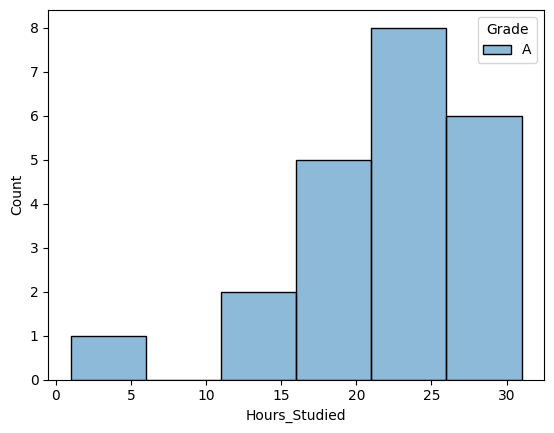

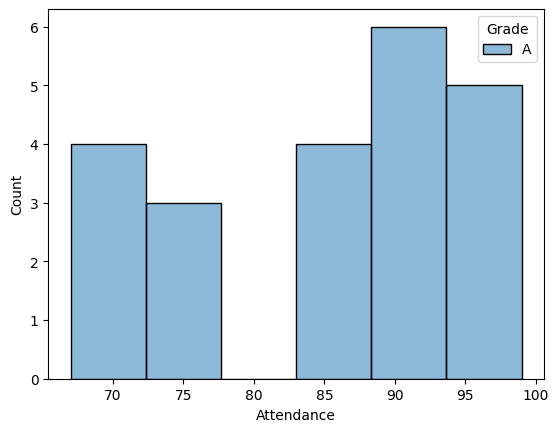

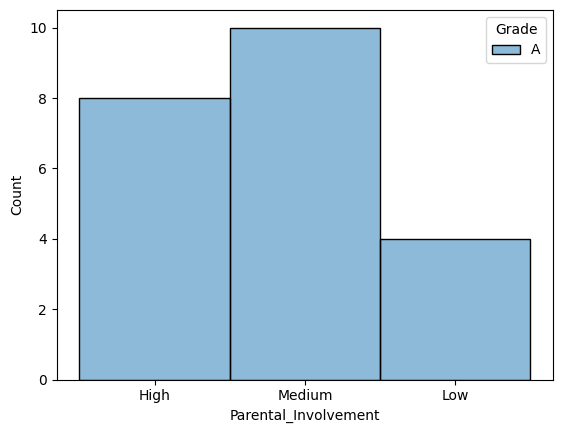

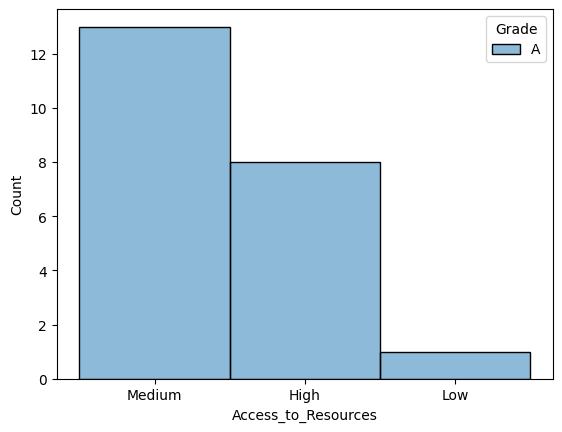

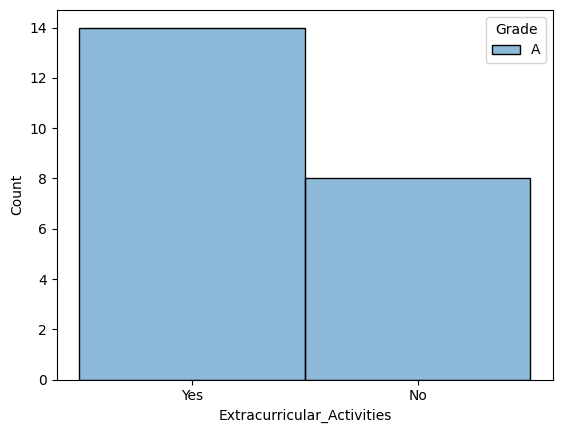

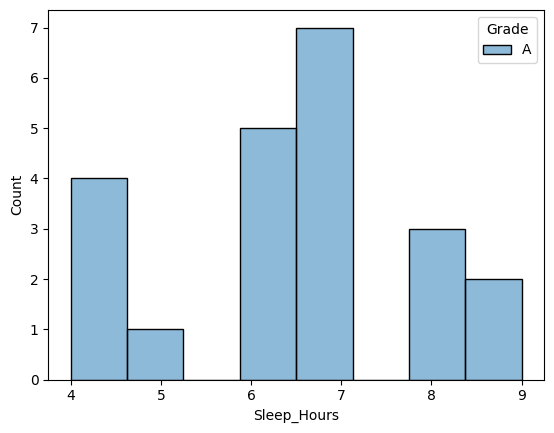

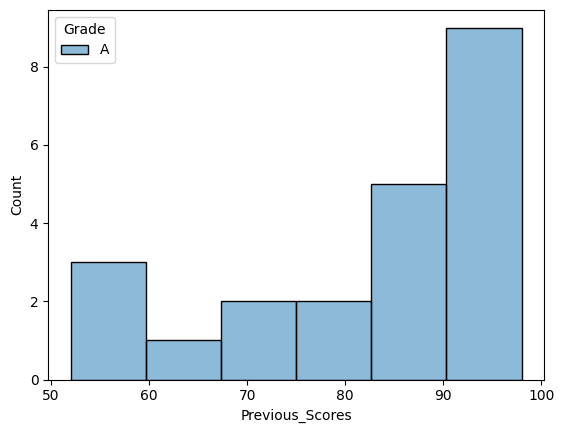

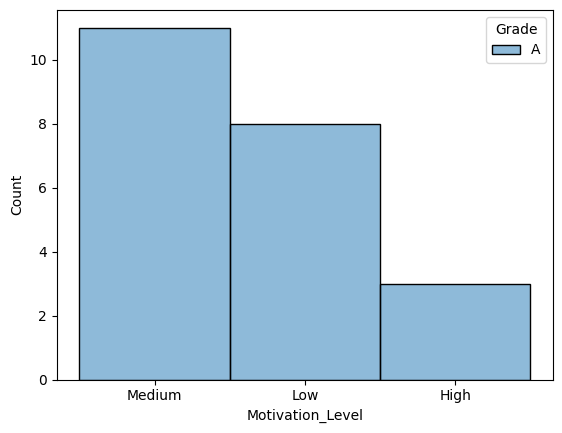

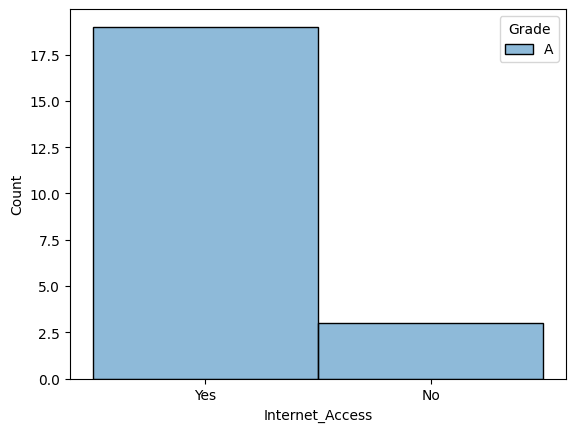

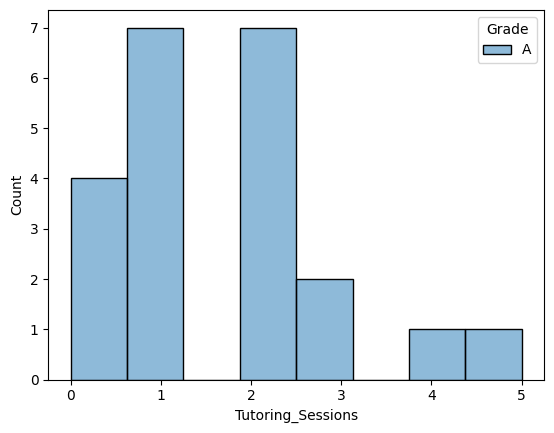

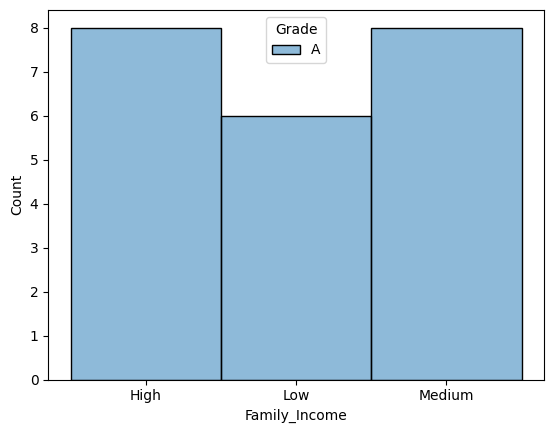

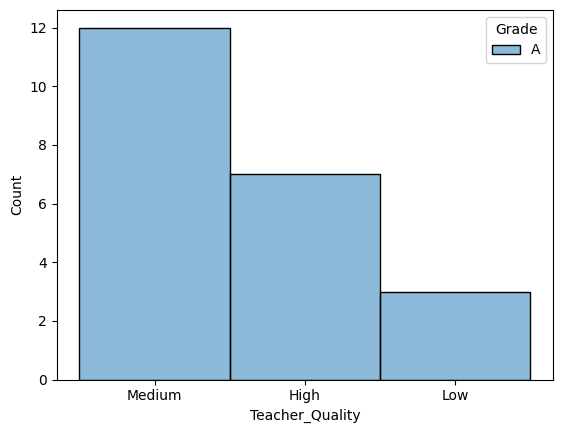

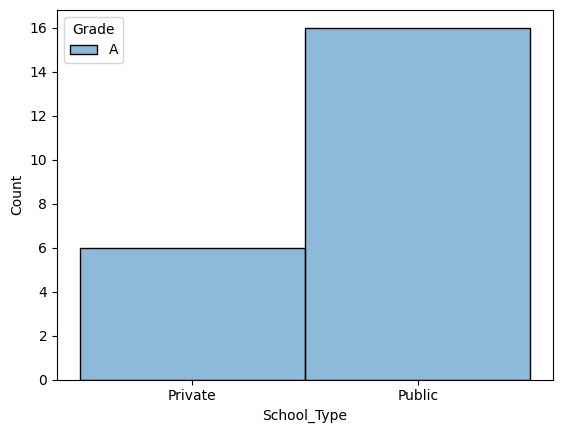

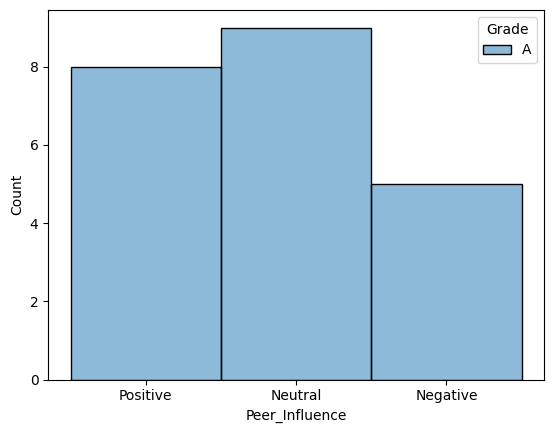

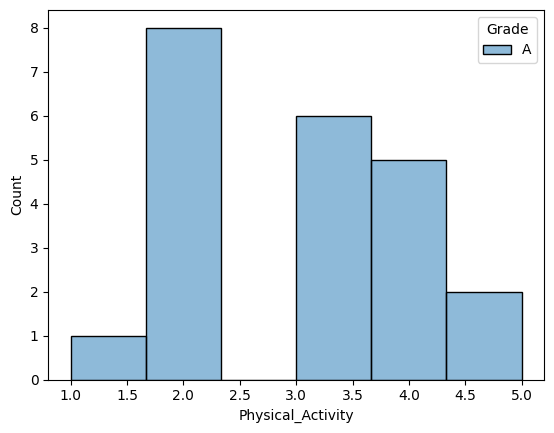

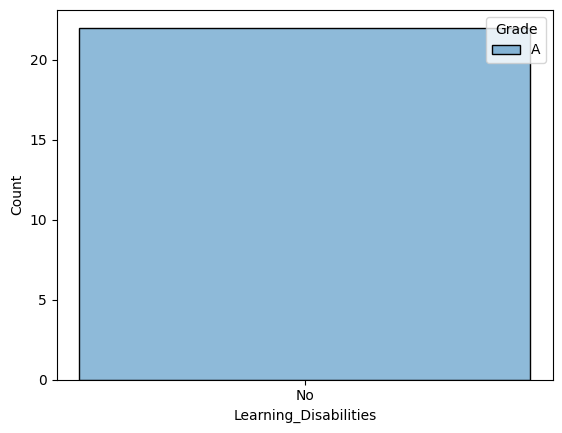

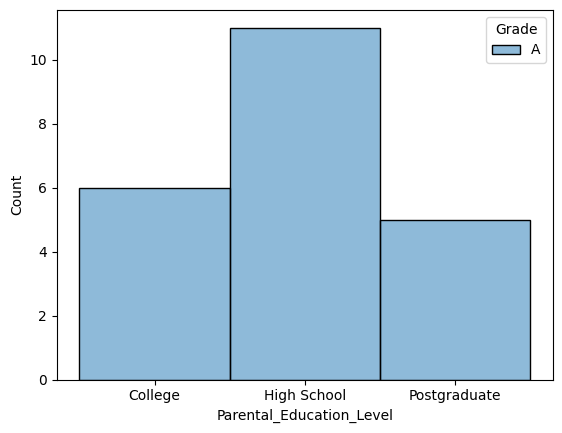

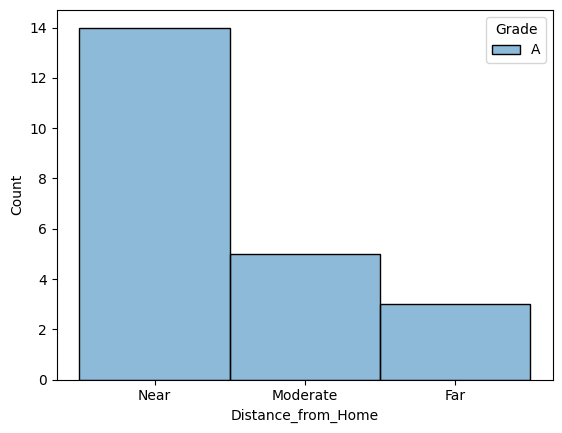

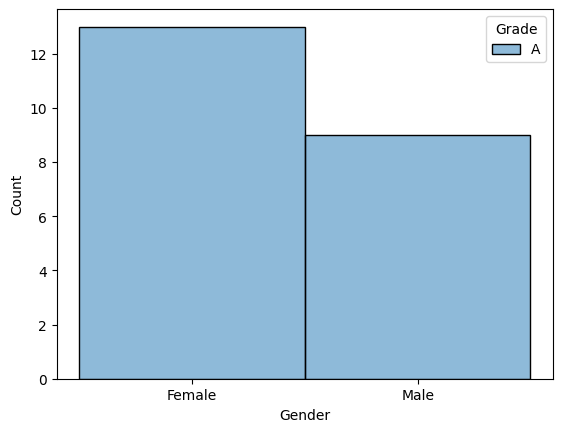

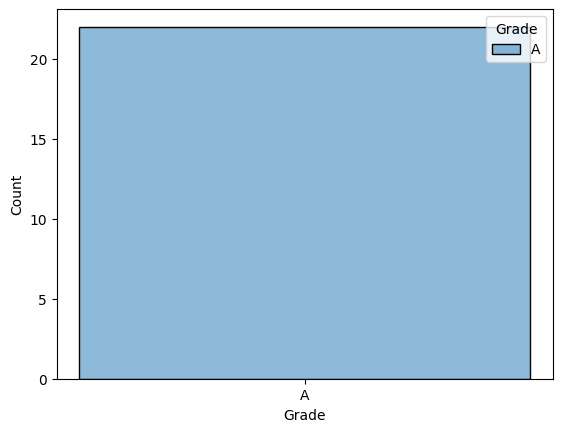

In [ ]:
best_scores = df.query('Grade == "A"')
for col in df.columns:
  sns.histplot(data=best_scores, x=col,hue='Grade')
  plt.show()

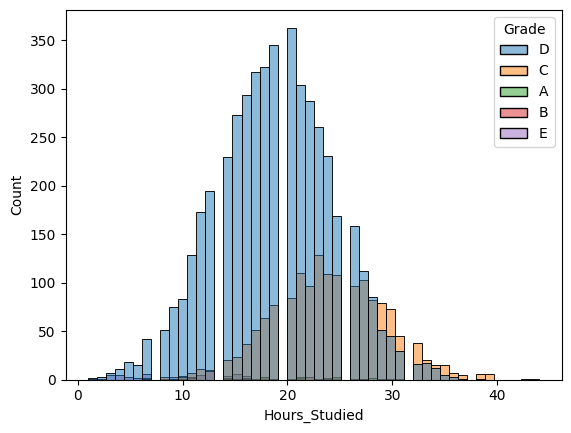

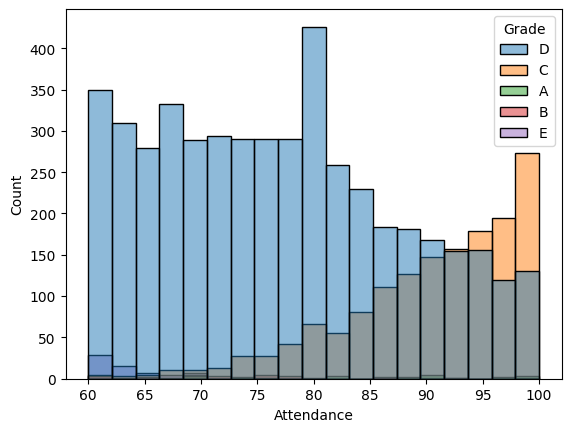

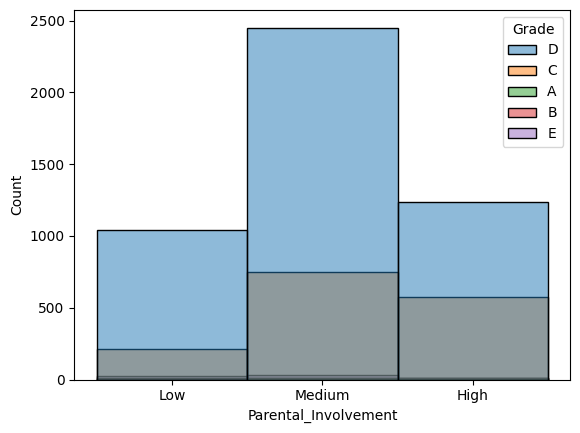

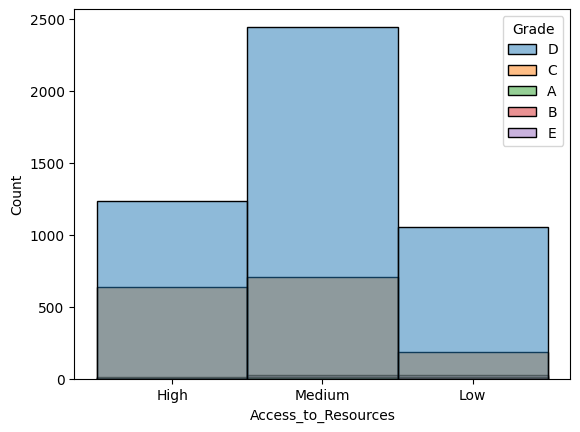

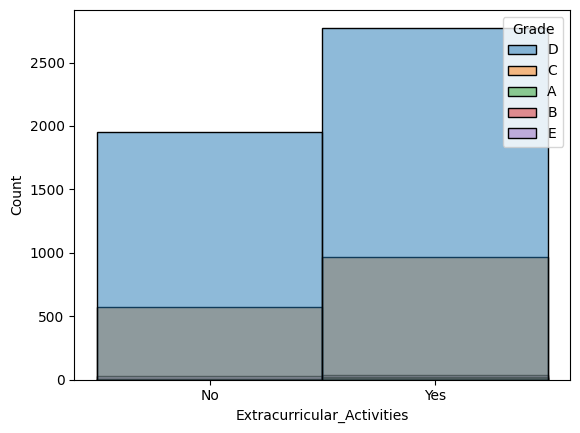

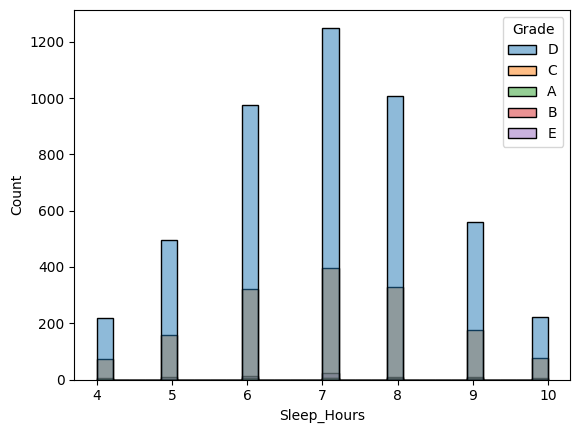

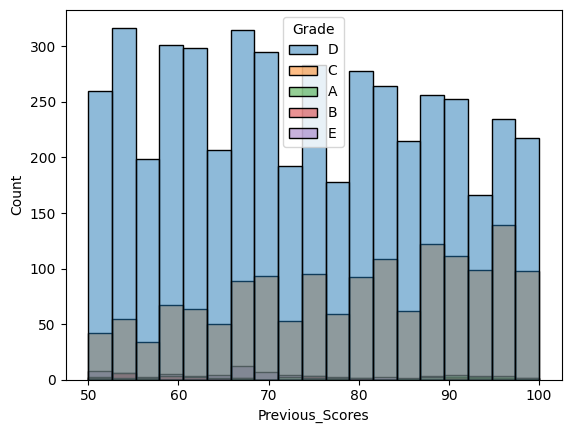

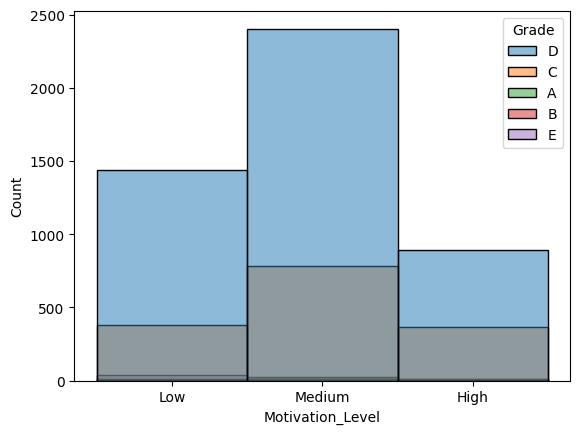

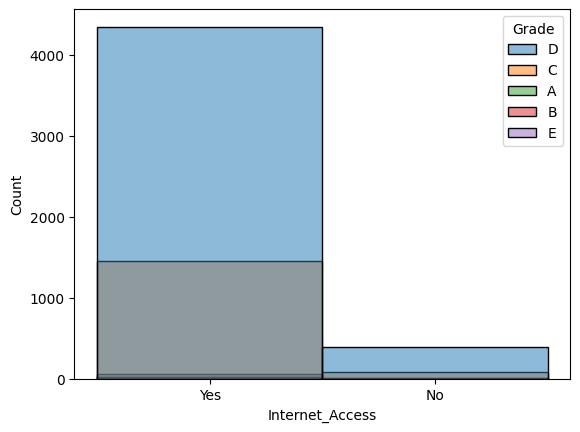

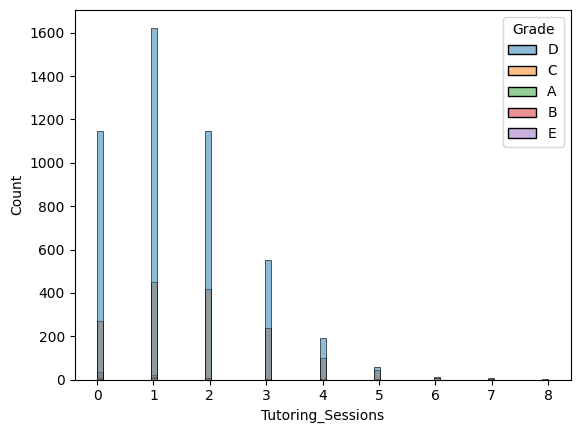

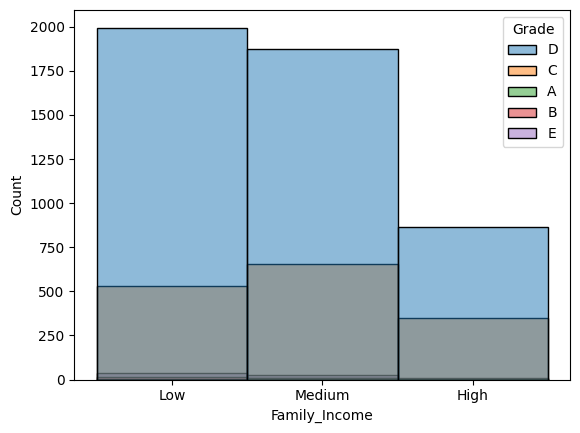

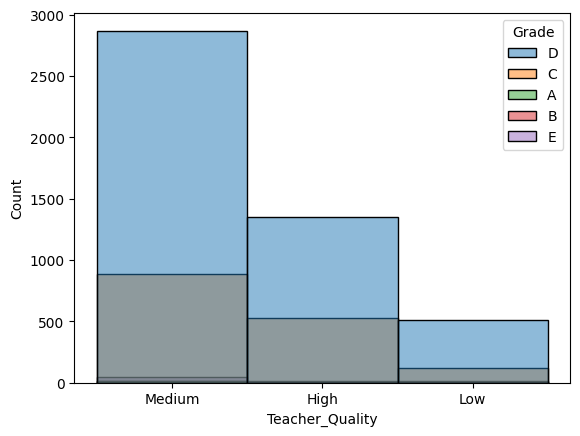

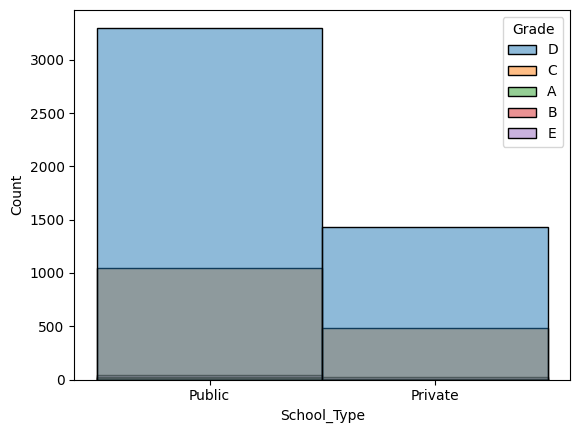

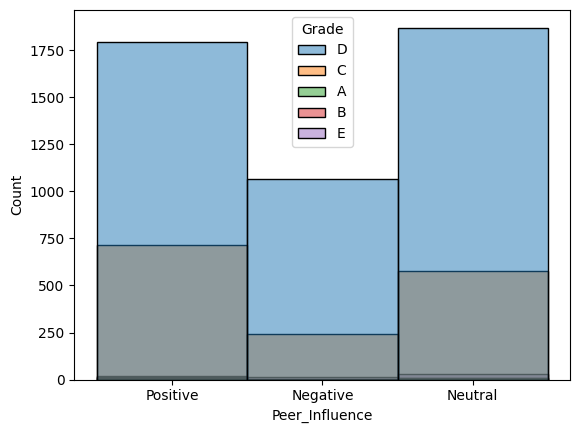

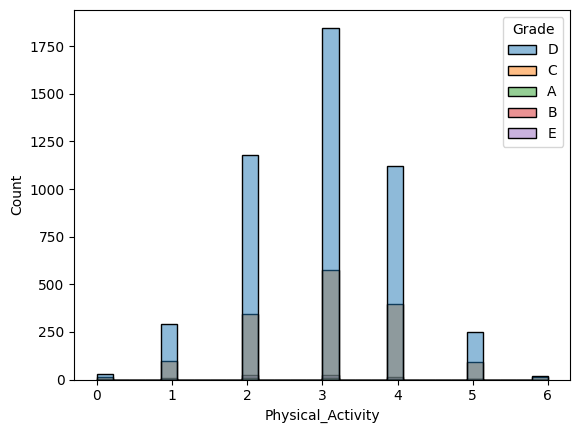

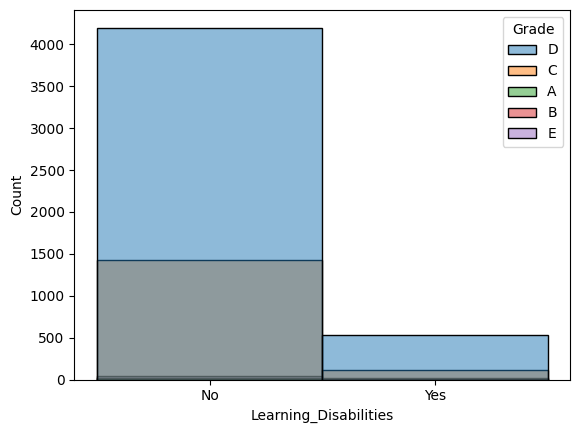

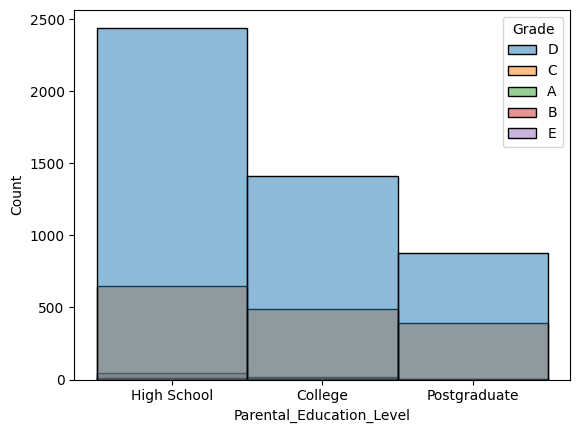

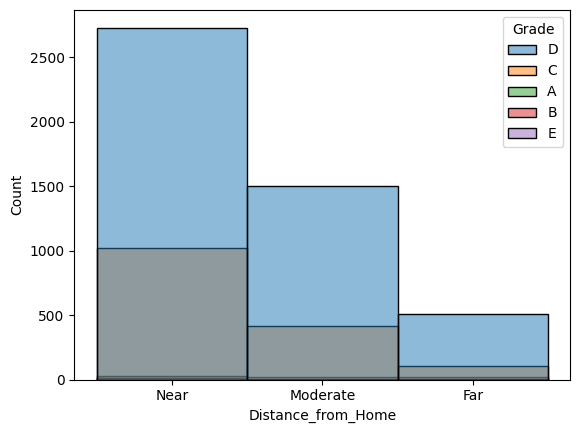

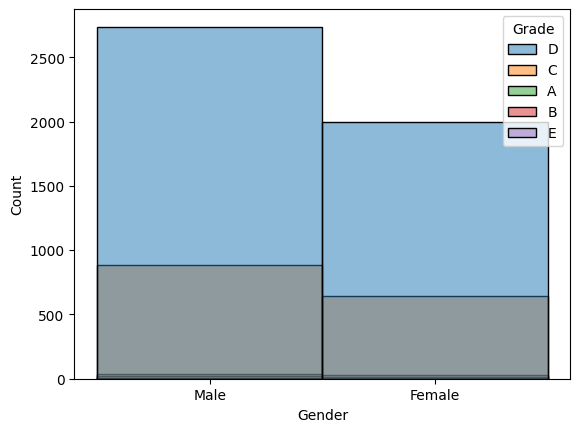

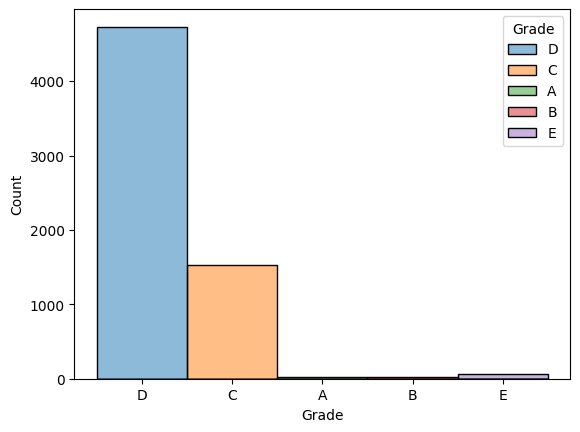

In [ ]:
for col in df.columns:
  sns.histplot(data=df, x=col,hue='Grade')
  plt.show()

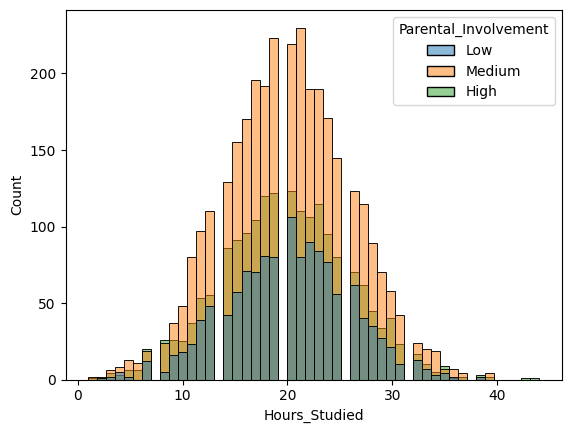

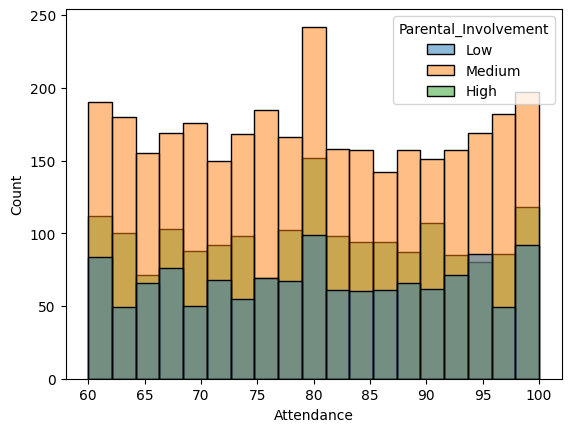

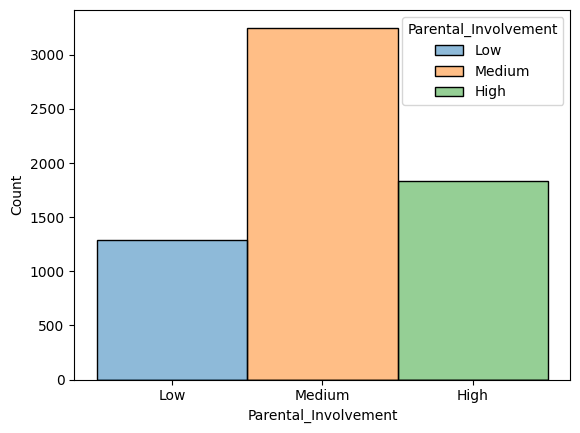

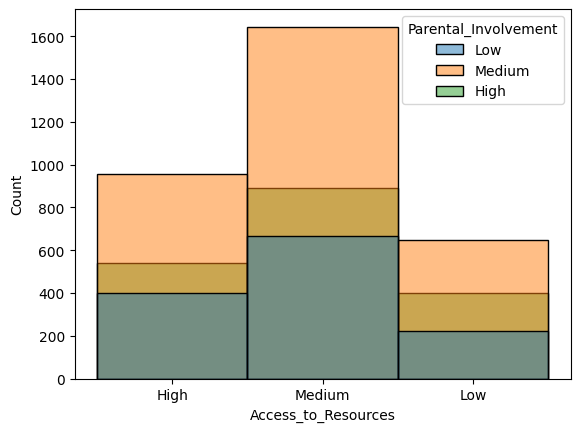

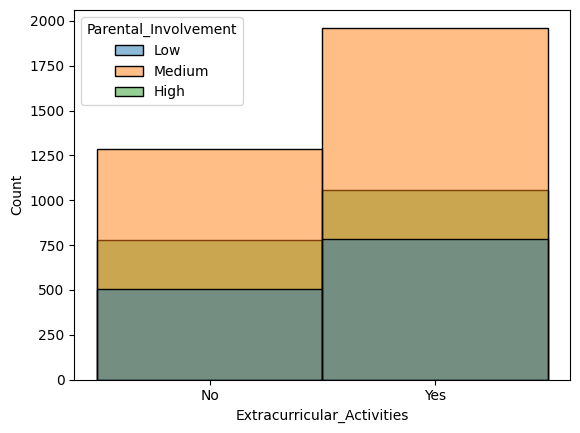

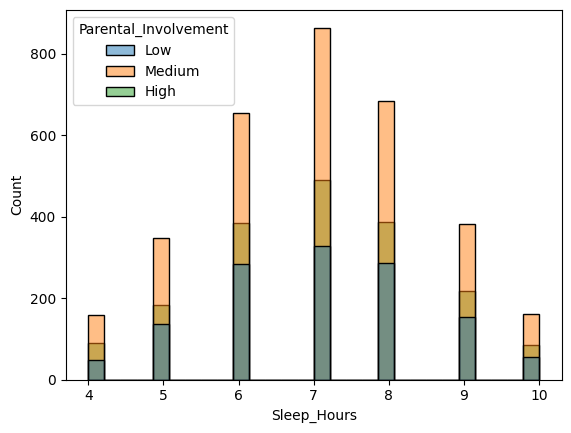

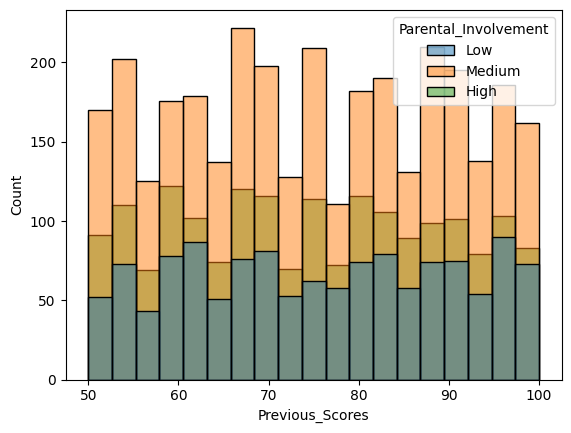

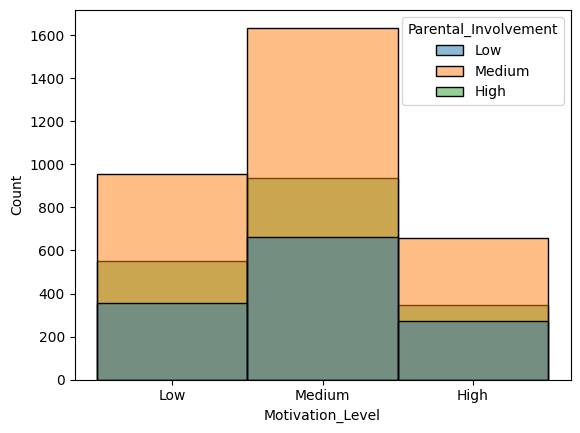

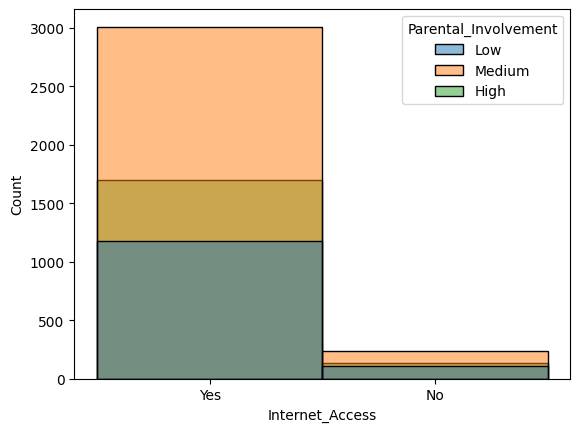

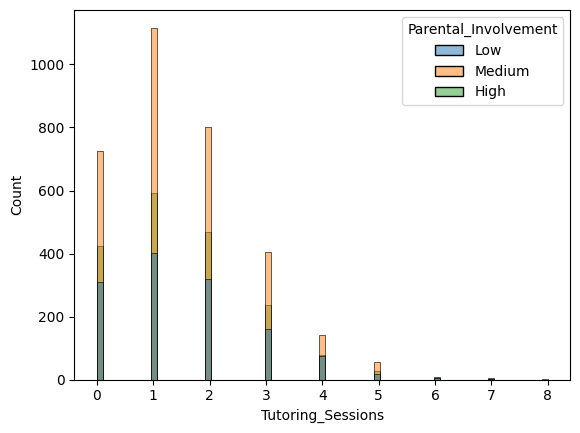

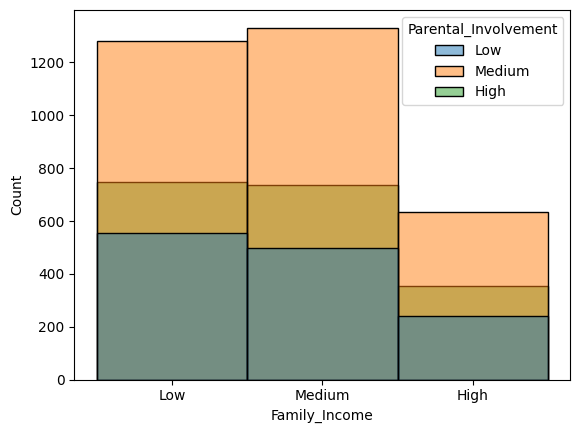

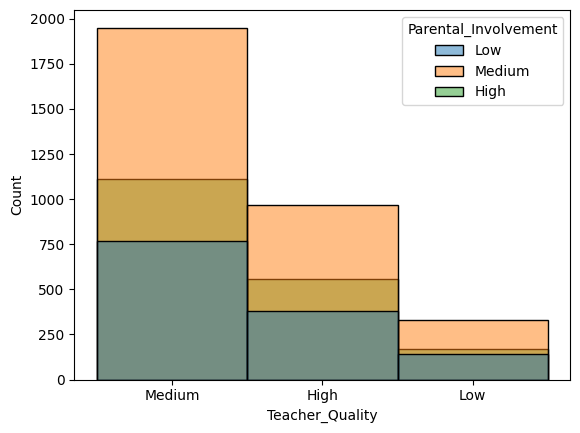

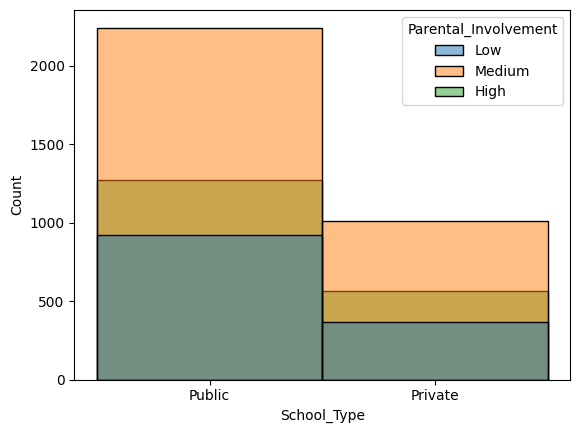

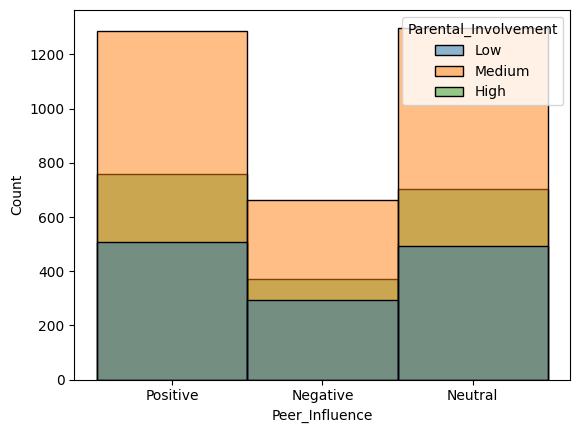

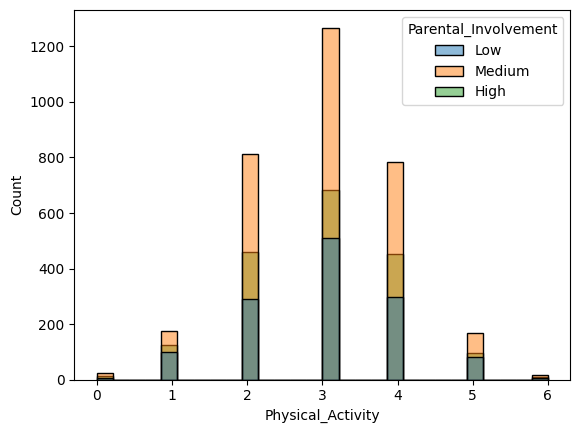

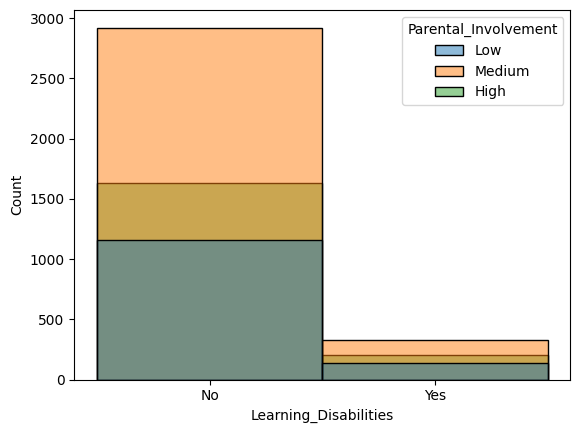

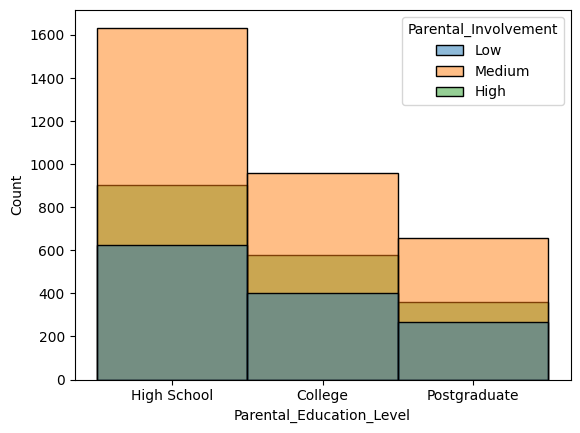

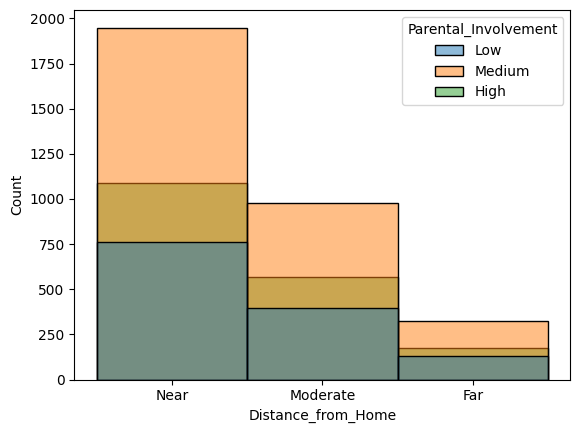

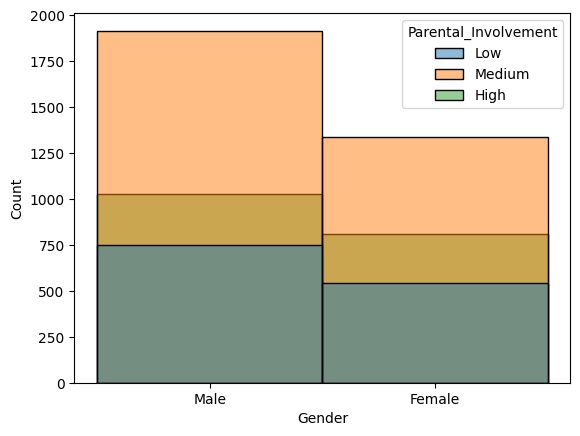

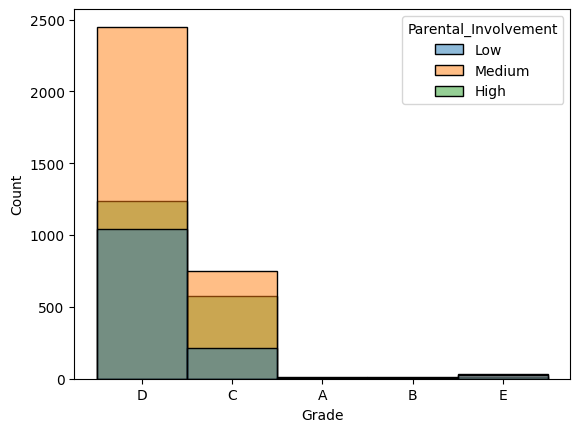

In [ ]:
for col in df.columns:
  sns.histplot(data=df, x=col,hue='Parental_Involvement')
  plt.show()

In [ ]:
df = df.drop(['Grade'], axis = 1)

In [ ]:
df_numerical = df.select_dtypes(include=np.number)
print(df_numerical.head())

df_categorical = df.select_dtypes(exclude=np.number)
print(df_categorical.head())

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  
0                  3  
1                  4  
2                  4  
3                  4  
4                  4  
  Parental_Involvement Access_to_Resources Extracurricular_Activities  \
0                  Low                High                         No   
1                  Low              Medium                         No   
2               Medium              Medium                        Yes   
3                  Low              Medium                        Yes   
4         

In [ ]:
df_categorical.shape,df_numerical.shape

((6343, 13), (6343, 6))

In [ ]:
Parental_Involvement = pd.get_dummies(df_categorical.Parental_Involvement, drop_first=True).rename(columns=lambda x: 'Parental_Involvement_' + str(x))
Access_to_Resources = pd.get_dummies(df_categorical.Access_to_Resources, drop_first=True).rename(columns=lambda x: 'Access_to_Resources_' + str(x))
Motivation_Level = pd.get_dummies(df_categorical.Motivation_Level, drop_first=True).rename(columns=lambda x: 'Motivation_Level_' + str(x))
Family_Income = pd.get_dummies(df_categorical.Family_Income, drop_first=True).rename(columns=lambda x: 'Family_Income_' + str(x))
Teacher_Quality = pd.get_dummies(df_categorical.Teacher_Quality, drop_first=True).rename(columns=lambda x: 'Teacher_Quality_' + str(x))
Peer_Influence = pd.get_dummies(df_categorical.Peer_Influence, drop_first=True).rename(columns=lambda x: 'Peer_Influence_' + str(x))
Parental_Education_Level = pd.get_dummies(df_categorical.Parental_Education_Level, drop_first=True).rename(columns=lambda x: ('Parental_Education_Level_' + str(x)).replace(' ', '_'))
Distance_from_Home = pd.get_dummies(df_categorical.Distance_from_Home, drop_first=True).rename(columns=lambda x: 'Distance_from_Home_' + str(x))

In [ ]:
df_dummy = pd.concat([Parental_Involvement, Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Peer_Influence,Parental_Education_Level,Distance_from_Home], axis=1)

df_dummy['Extracurricular_Activities'] = pd.get_dummies(df.Extracurricular_Activities, drop_first=True)
df_dummy['Internet_Access'] = pd.get_dummies(df.Internet_Access, drop_first=True)
df_dummy['School_Type'] = pd.get_dummies(df.School_Type, drop_first=True)
df_dummy['Learning_Disabilities'] = pd.get_dummies(df.Learning_Disabilities, drop_first=True)
df_dummy['Gender'] = pd.get_dummies(df.Gender, drop_first=True)

df_dummy = df_dummy.replace({True:1,False:0})

df_dummy

<ipython-input-979-f428cf8a40a6>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dummy = df_dummy.replace({True:1,False:0})


,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,...,Peer_Influence_Positive,Parental_Education_Level_High_School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities,Internet_Access,School_Type,Learning_Disabilities,Gender
0,1,0,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,1,1,0,1
1,1,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
2,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,1,1,1,0,1
3,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,1,0,1
4,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,0,0,0,1,0,1,0,0,0,1,...,1,1,0,0,1,0,1,1,0,0
6339,0,0,0,1,0,1,1,0,0,0,...,1,1,0,0,1,0,1,1,0,0
6340,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,1,1,1,0,0
6341,0,0,0,0,0,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,0


In [ ]:
df_dummy.shape

(6343, 21)

**Modelo Regressão Linear**

In [ ]:
dataset = pd.concat([df_numerical, df_dummy], axis=1)
dataset.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Peer_Influence_Positive,Parental_Education_Level_High_School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities,Internet_Access,School_Type,Learning_Disabilities,Gender
0,23,84,7,73,0,3,1,0,0,0,...,1,1,0,0,1,0,1,1,0,1
1,19,64,8,59,2,4,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
2,24,98,7,91,2,4,0,1,0,1,...,0,0,1,0,1,1,1,1,0,1
3,29,89,8,98,1,4,1,0,0,1,...,0,1,0,1,0,1,1,1,0,1
4,19,92,6,65,3,4,0,1,0,1,...,0,0,0,0,1,1,1,1,0,0


In [ ]:
dataset.shape

(6343, 27)

In [ ]:
Y = target
X = dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5074, 27), (1269, 27), (5074,), (1269,))

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R2 score:", r2_score(Y_test, predictions))
print("Mean Squared Error:", mean_squared_error(Y_test, predictions))

Coefficients: [ 0.29580415  0.19677167  0.00631481  0.04759395  0.49204281  0.20241855
 -1.94810109 -1.0014291  -1.90452912 -0.95489825 -1.0518784  -0.55079603
 -0.98873338 -0.50263977 -1.04770829 -0.52988345  0.50759424  0.99356789
 -0.50839679  0.51903758  0.45058381  0.95482129  0.52907002  0.97987393
  0.03866184 -0.87371896  0.00454743]
Intercept: 41.57654970522562
R2 score: 0.9728408050183875
Mean Squared Error: 0.2886182631553676


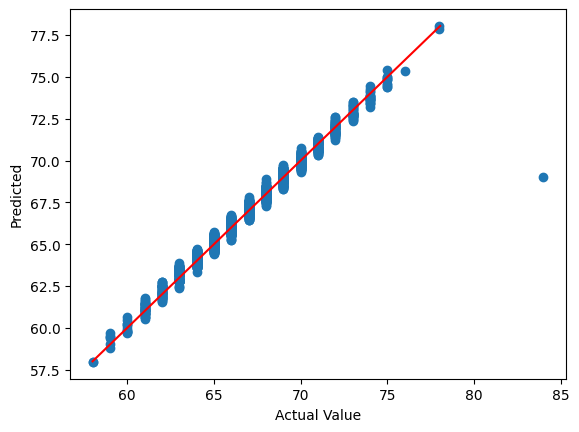

In [ ]:
%matplotlib inline
plt.scatter(Y_test, predictions)
dist = [Y_test.min(), predictions.max()]
plt.xlabel('Actual Value')
plt.ylabel('Predicted')
plt.plot(dist, dist, color='red')
plt.show()

Pontinhos separados = Outliers

Aplicando tratamento de Outliers E normalização

In [ ]:
outliers = {}

In [ ]:
#usei capping pois eu gosto desse método
df_outl = df_numerical.copy()
for feature in df_outl.columns:
  Q1 = df_outl[feature].quantile(0.25)
  Q3 = df_outl[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outlier_mask = (df_outl[feature] < lower_bound) | (df_outl[feature] > upper_bound)
  outliers[feature] = outlier_mask.sum()

  df_outl[feature] = np.where(df_outl[feature] > upper_bound, upper_bound, df_outl[feature])
  df_outl[feature] = np.where(df_outl[feature] < lower_bound, lower_bound, df_outl[feature])

In [ ]:
df_outl.shape

(6343, 6)

In [ ]:
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (target < lower_bound) | (target > upper_bound)
outliers['Nota'] = outlier_mask.sum()

In [ ]:
#target = np.where(target > upper_bound, upper_bound, target)
#target = np.where(target < lower_bound, lower_bound, target)

In [ ]:
outliers

{'Hours_Studied': 39,
 'Attendance': 0,
 'Sleep_Hours': 0,
 'Previous_Scores': 0,
 'Tutoring_Sessions': 421,
 'Physical_Activity': 0,
 'Nota': 68}

In [ ]:
dataset = pd.concat([df_outl, df_dummy], axis=1)
dataset.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Peer_Influence_Positive,Parental_Education_Level_High_School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities,Internet_Access,School_Type,Learning_Disabilities,Gender
0,23.0,84.0,7.0,73.0,0.0,3.0,1,0,0,0,...,1,1,0,0,1,0,1,1,0,1
1,19.0,64.0,8.0,59.0,2.0,4.0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
2,24.0,98.0,7.0,91.0,2.0,4.0,0,1,0,1,...,0,0,1,0,1,1,1,1,0,1
3,29.0,89.0,8.0,98.0,1.0,4.0,1,0,0,1,...,0,1,0,1,0,1,1,1,0,1
4,19.0,92.0,6.0,65.0,3.0,4.0,0,1,0,1,...,0,0,0,0,1,1,1,1,0,0


In [ ]:
dataset.shape

(6343, 27)

Coefficients: [ 0.29768188  0.19682074  0.00532     0.04791836  0.54311433  0.20707782
 -1.94881011 -1.00803977 -1.90513332 -0.95275538 -1.05022457 -0.54368188
 -0.98976491 -0.50490016 -1.04668925 -0.53818079  0.50040911  0.9908827
 -0.50887419  0.51275527  0.4469051   0.95432266  0.52205913  0.98757322
  0.04072864 -0.86705519  0.00236503]
Intercept: 41.46896991484503
R2 score: 0.9716697600784847
Mean Squared Error: 0.30106284985465925


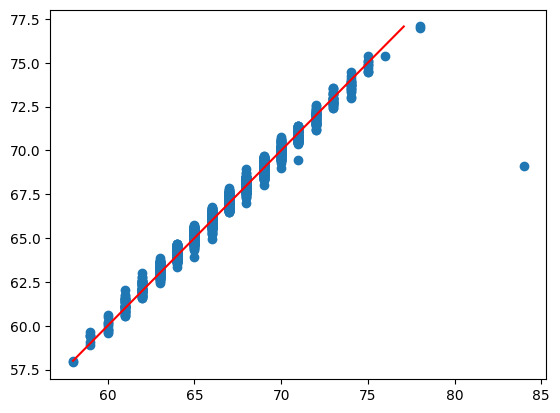

In [ ]:
Y = target
X = dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R2 score:", r2_score(Y_test, predictions))
print("Mean Squared Error:", mean_squared_error(Y_test, predictions))

%matplotlib inline
plt.scatter(Y_test, predictions)
dist = [Y_test.min(), predictions.max()]
plt.plot(dist, dist, color='red')
plt.show()

Fazendo Normalização (vê se melhora alguma coisa)

In [ ]:
scaler_minmax = MinMaxScaler()
df_minmax = scaler_minmax.fit_transform(df_outl)
df_minmax = pd.DataFrame(df_minmax, columns=df_outl.columns)

In [ ]:
dataset = pd.concat([df_minmax, df_dummy], axis=1)
dataset.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Peer_Influence_Positive,Parental_Education_Level_High_School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities,Internet_Access,School_Type,Learning_Disabilities,Gender
0,0.59375,0.600,0.500000,0.46,0.000000,0.500000,1,0,0,0,...,1,1,0,0,1,0,1,1,0,1
1,0.46875,0.100,0.666667,0.18,0.571429,0.666667,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
2,0.62500,0.950,0.500000,0.82,0.571429,0.666667,0,1,0,1,...,0,0,1,0,1,1,1,1,0,1
3,0.78125,0.725,0.666667,0.96,0.285714,0.666667,1,0,0,1,...,0,1,0,1,0,1,1,1,0,1
4,0.46875,0.800,0.333333,0.30,0.857143,0.666667,0,1,0,1,...,0,0,0,0,1,1,1,1,0,0


Coefficients: [ 9.52582021e+00  7.87282970e+00  3.19199877e-02  2.39591793e+00
  1.90090015e+00  1.24246693e+00 -1.94881011e+00 -1.00803977e+00
 -1.90513332e+00 -9.52755384e-01 -1.05022457e+00 -5.43681876e-01
 -9.89764905e-01 -5.04900158e-01 -1.04668925e+00 -5.38180790e-01
  5.00409105e-01  9.90882695e-01 -5.08874191e-01  5.12755275e-01
  4.46905098e-01  9.54322655e-01  5.22059127e-01  9.87573218e-01
  4.07286401e-02 -8.67055195e-01  2.36502594e-03]
Intercept: 56.88613992031486
R2 score: 0.9716697600784847
Mean Squared Error: 0.3010628498546595


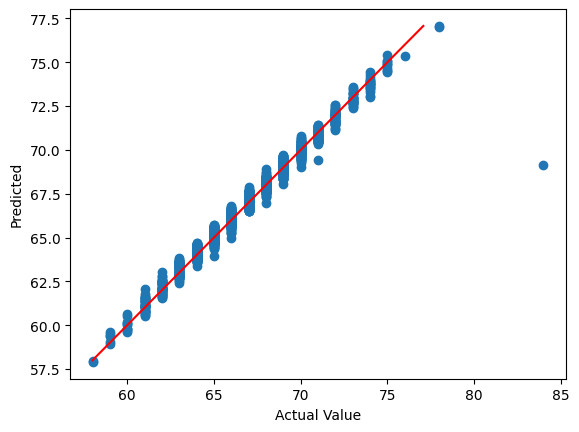

In [ ]:
Y = target
X = dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R2 score:", r2_score(Y_test, predictions))
print("Mean Squared Error:", mean_squared_error(Y_test, predictions))

%matplotlib inline
plt.scatter(Y_test, predictions)
dist = [Y_test.min(), predictions.max()]
plt.xlabel('Actual Value')
plt.ylabel('Predicted')
plt.plot(dist, dist, color='red')
plt.show()

In [ ]:
corr = np.corrcoef(predictions, Y_test)
print(corr)

[[1.         0.98597815]
 [0.98597815 1.        ]]


In [ ]:
len(model.coef_)

27

In [ ]:
model.coef_

array([ 9.52582021e+00,  7.87282970e+00,  3.19199877e-02,  2.39591793e+00,
        1.90090015e+00,  1.24246693e+00, -1.94881011e+00, -1.00803977e+00,
       -1.90513332e+00, -9.52755384e-01, -1.05022457e+00, -5.43681876e-01,
       -9.89764905e-01, -5.04900158e-01, -1.04668925e+00, -5.38180790e-01,
        5.00409105e-01,  9.90882695e-01, -5.08874191e-01,  5.12755275e-01,
        4.46905098e-01,  9.54322655e-01,  5.22059127e-01,  9.87573218e-01,
        4.07286401e-02, -8.67055195e-01,  2.36502594e-03])

In [ ]:
dataset.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_Low',
       'Access_to_Resources_Medium', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Family_Income_Low', 'Family_Income_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'Parental_Education_Level_High_School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near', 'Extracurricular_Activities',
       'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender'],
      dtype='object')

In [ ]:
columns = dataset.columns

In [ ]:
for coef, column in zip(model.coef_, columns):
  print(f"Coefficient for {column}: {coef}")

Coefficient for Hours_Studied: 9.525820205040203
Coefficient for Attendance: 7.87282970333718
Coefficient for Sleep_Hours: 0.031919987667164446
Coefficient for Previous_Scores: 2.395917933055896
Coefficient for Tutoring_Sessions: 1.900900147343395
Coefficient for Physical_Activity: 1.2424669270095412
Coefficient for Parental_Involvement_Low: -1.9488101113387135
Coefficient for Parental_Involvement_Medium: -1.0080397705265163
Coefficient for Access_to_Resources_Low: -1.9051333212309387
Coefficient for Access_to_Resources_Medium: -0.9527553841318454
Coefficient for Motivation_Level_Low: -1.0502245738479188
Coefficient for Motivation_Level_Medium: -0.543681876138285
Coefficient for Family_Income_Low: -0.9897649054420641
Coefficient for Family_Income_Medium: -0.5049001584793517
Coefficient for Teacher_Quality_Low: -1.0466892478804772
Coefficient for Teacher_Quality_Medium: -0.5381807898045915
Coefficient for Peer_Influence_Neutral: 0.500409105293148
Coefficient for Peer_Influence_Positive:

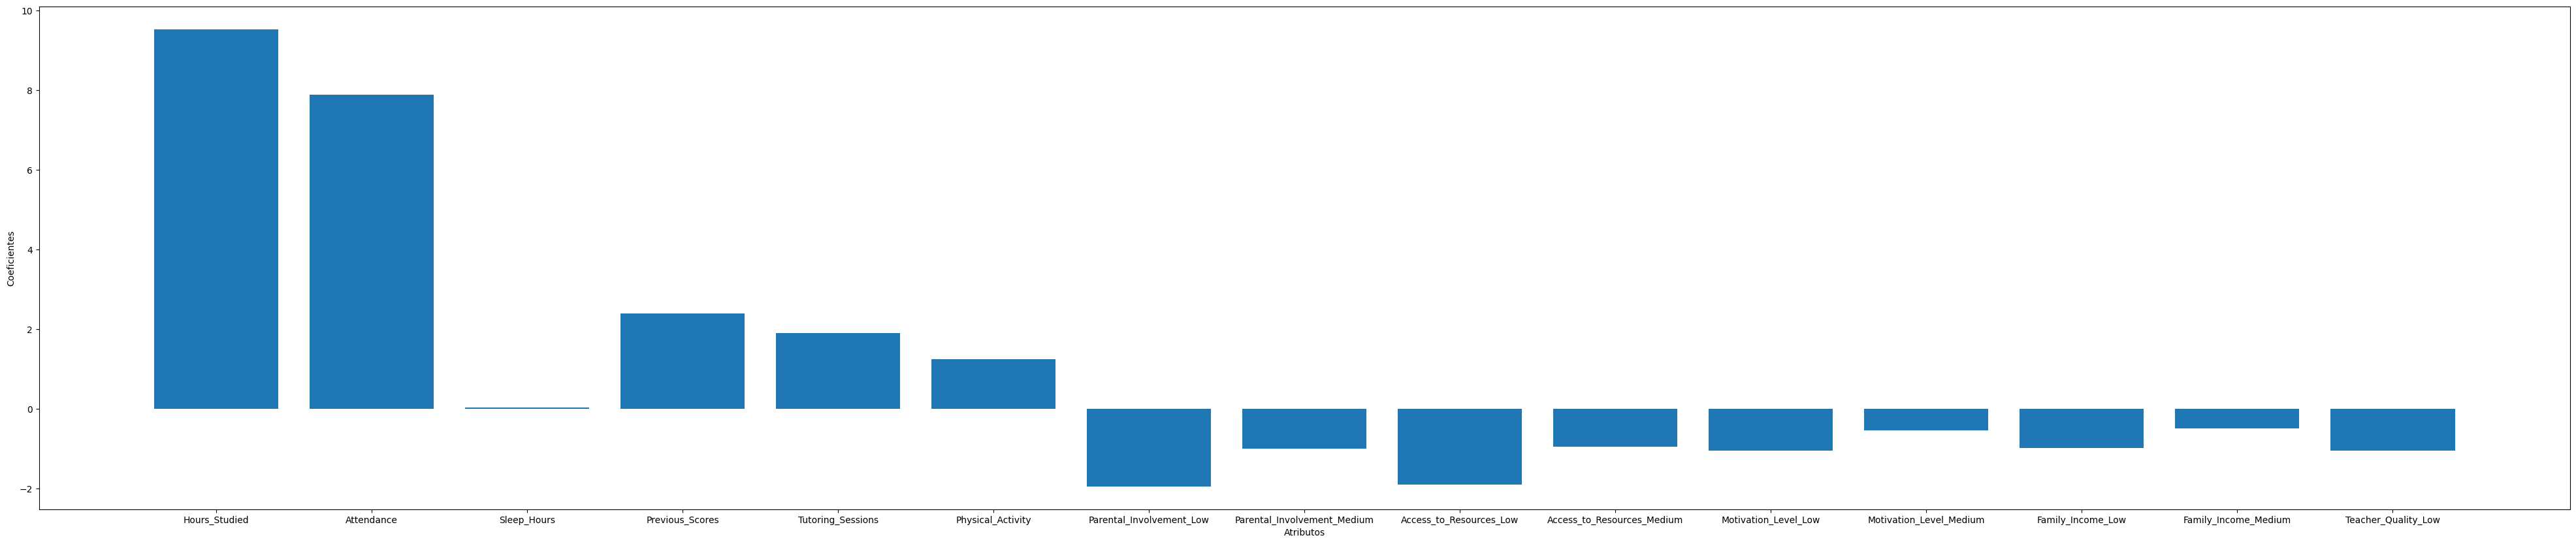

In [ ]:
plt.figure(figsize=(50,10))
plt.bar(columns[:15], model.coef_[:15])
plt.xlabel('Atributos')
plt.ylabel('Coeficientes')
plt.show()

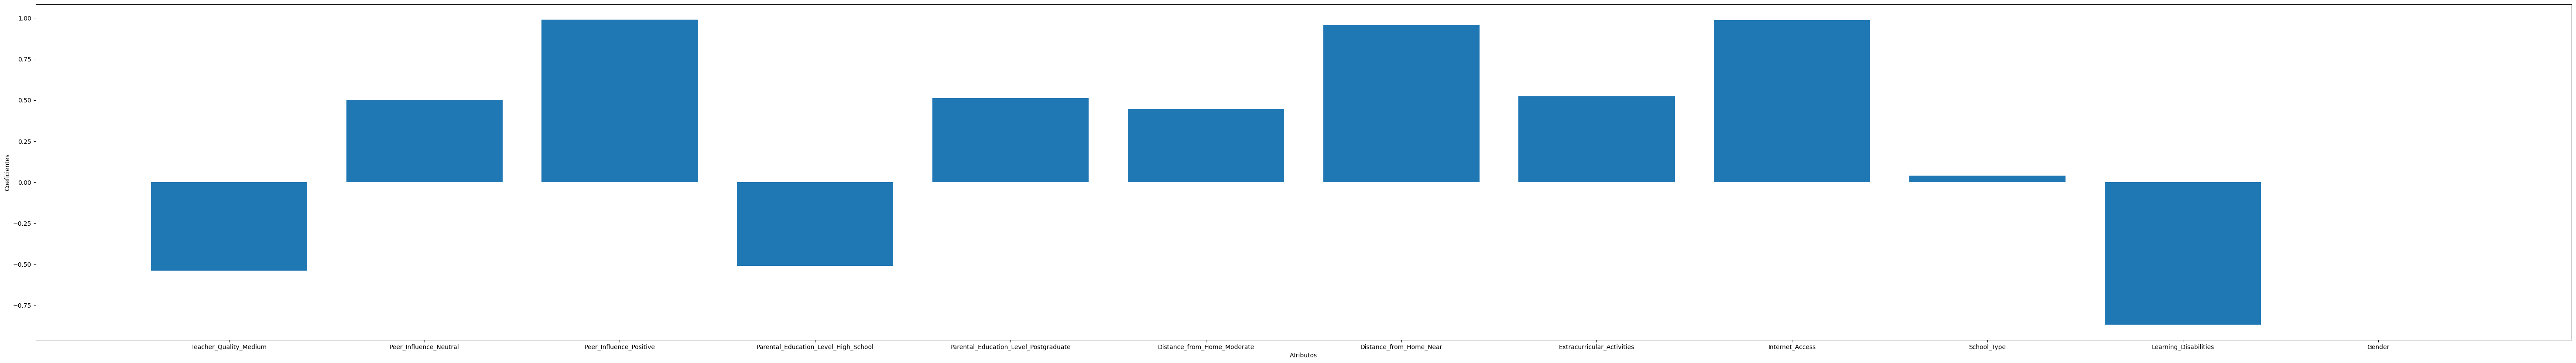

In [ ]:
plt.figure(figsize=(75,10))
plt.bar(columns[15:], model.coef_[15:])
plt.xlabel('Atributos')
plt.ylabel('Coeficientes')
plt.show()

vou fazer o PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(dataset)

PCA(n_components=3)

In [ ]:
print("Auto-valores")
print(pca.explained_variance_)
print()

print("Auto-vetores")
print(pca.components_)
print()

print("Variância Explicada")
print(pca.explained_variance_ratio_)
print()

Auto-valores
[0.42076217 0.40067865 0.39251739]

Auto-vetores
[[-2.24850027e-03  7.29821586e-03  5.42220579e-04  9.09303767e-03
   6.07545038e-03  1.86257340e-03 -3.82145003e-02  6.27365663e-02
  -1.48896254e-02  3.92751553e-02 -1.07204552e-01  1.17050503e-01
  -3.51274236e-01  3.56122799e-01 -1.56995573e-03  1.00510993e-02
   2.82420469e-01 -2.74708104e-01  3.25634081e-02 -1.44598463e-02
  -5.07515029e-01  5.48208634e-01 -4.87256552e-02  3.97465368e-03
  -2.01922838e-03  5.38300276e-03  1.10053783e-02]
 [-4.40815090e-03  1.61405405e-02  4.06601614e-03  9.11745970e-03
  -2.38806518e-03 -5.39924250e-03  3.82504229e-02 -4.49115153e-02
   1.47888690e-02 -4.15086488e-02 -9.29874251e-02  1.23201726e-01
   5.87874728e-01 -5.81320934e-01  2.89011305e-02 -5.53769919e-02
   3.03213847e-01 -3.12728460e-01  5.79864813e-02 -3.04646717e-02
  -1.97805253e-01  2.17231055e-01 -4.67827463e-02 -3.34501763e-03
  -1.86900684e-02 -1.33438402e-03  3.21910519e-03]
 [ 1.19084726e-03  5.95223206e-03  8.4941146

In [ ]:
df_pca=pd.DataFrame(pca.components_,columns=columns)

df_pca

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Peer_Influence_Positive,Parental_Education_Level_High_School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities,Internet_Access,School_Type,Learning_Disabilities,Gender
0,-0.002249,0.007298,0.000542,0.009093,0.006075,0.001863,-0.038215,0.062737,-0.014890,0.039275,...,-0.274708,0.032563,-0.014460,-0.507515,0.548209,-0.048726,0.003975,-0.002019,0.005383,0.011005
1,-0.004408,0.016141,0.004066,0.009117,-0.002388,-0.005399,0.038250,-0.044912,0.014789,-0.041509,...,-0.312728,0.057986,-0.030465,-0.197805,0.217231,-0.046783,-0.003345,-0.018690,-0.001334,0.003219
2,0.001191,0.005952,0.008494,0.004568,-0.003072,-0.000757,-0.015015,0.030997,0.012877,-0.015898,...,-0.530661,0.010792,-0.003188,0.398884,-0.432980,-0.007358,0.007299,-0.013708,0.001708,0.025670


In [ ]:
pca.explained_variance_ratio_

array([0.0898852 , 0.08559486, 0.08385142])

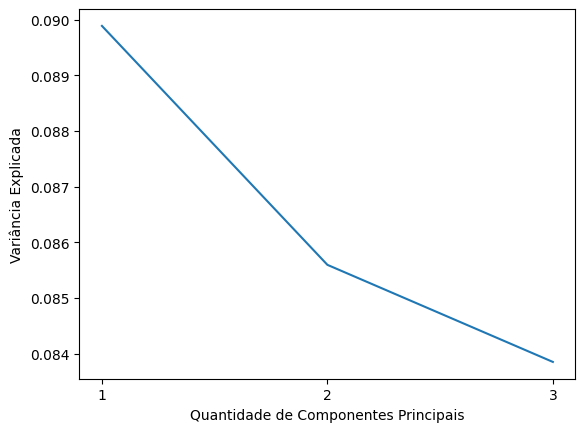

In [ ]:
n_vectors = list(range(1,len(pca.explained_variance_ratio_)+1))
plt.xticks(n_vectors)
plt.plot(n_vectors, pca.explained_variance_ratio_)
plt.xlabel("Quantidade de Componentes Principais")
plt.ylabel("Variância Explicada")
plt.show()

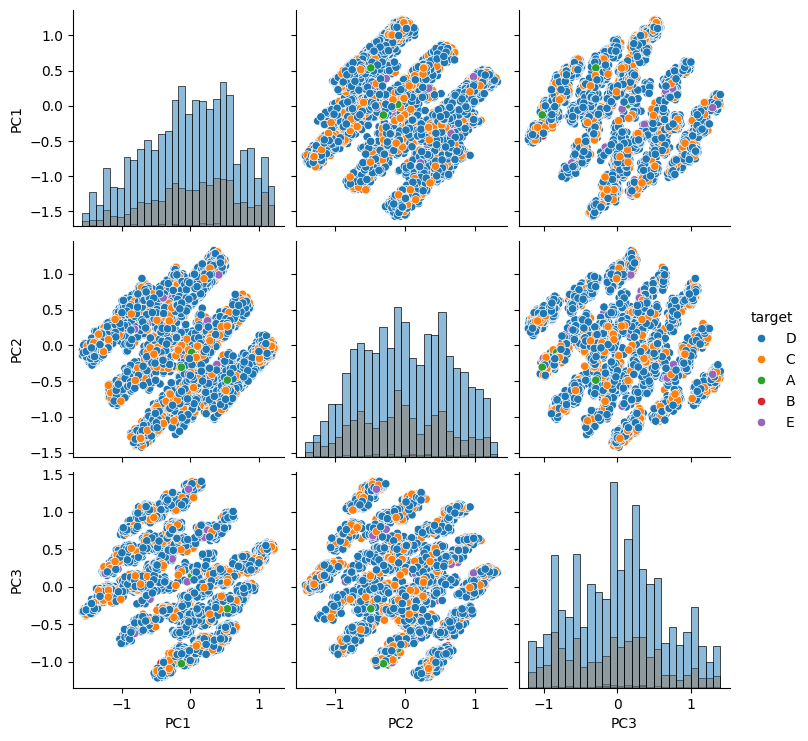

In [ ]:
X = pca.transform(dataset)

new_df = pd.DataFrame(X, columns=['PC1', 'PC2', 'PC3'])
new_df['target'] = Grade
sns.pairplot(
    new_df, vars=['PC1', 'PC2', 'PC3'], hue='target', diag_kind='hist')
plt.show()


Descobri que eu não entendi como isso funciona direito